## Protein data bank

<img src="./images/PEG-dark.webp"/>

Today, I'll be demonstrating the data analysis of molecular simulation trajectories.

All of the PDB files can be obtained from [Protein Data bank](.

[Usage Policies](https://www.rcsb.org/pages/policies):

Licensed under: CC0 1.0 Universal (CC0 1.0) Public Domain Dedication.

- Data on RCSB, as far as I understand, is provided by different authors using crystallography methods.
- Individual researchers download the pdb files, perform simulations and upload their trajectory files if they wish to.

## [PDB] -> (Molecular simulation software, like GROMACS, NAMD or LAMMPS) -> [Movie of the trajectory simulation]

Who curated this dataset (trajectory): Simon Ravelle, the guy who made the tutorial. He is a CNRS researcher at LIPhy in Grenoble, France, and uses molecular simulations to study fluids at interfaces and soft matter systems.

In [25]:
import numpy as np
import MDAnalysis as mda
import nglview as nv
from nglview.datafiles import PDB, XTC
import matplotlib.pyplot as plt

In [19]:
demonstrative_u = mda.Universe(PDB, XTC)

protein = demonstrative_u.select_atoms('protein')

w = nv.show_mdanalysis(protein)
w

NGLWidget(max_frame=50)

In [20]:
path_to_data = "./data/"
u = mda.Universe(path_to_data + "mix.data",
                 path_to_data + "dump.lammpstrj",
                 topology_format="data", format="lammpsdump")

/home/shaunak/Software/miniconda3/envs/MD/lib/python3.12/site-packages/MDAnalysis/coordinates/LAMMPS.py:598: UserWarning: Reader has no dt information, set to 1.0 ps
  ts.data['time'] = step_num * ts.dt


In [21]:
peg = u.select_atoms("type 1 2 3 4 5 6 7")
h2o = u.select_atoms("type 8 9")

atom1 = peg[0]
position_vs_time = []
for ts in u.trajectory:
    x, y, z = atom1.position
    position_vs_time.append([ts.frame, x, y, z])

In [23]:
p_vs_t = np.array(position_vs_time)

Text(0, 0.5, 'y (Angstrom)')

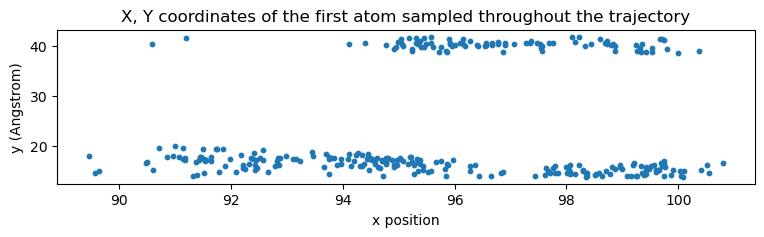

In [40]:
fig = plt.figure(figsize = (9, 2))
plt.title("X, Y coordinates of the first atom sampled throughout the trajectory")
plt.scatter(p_vs_t[:, 1], p_vs_t[:, 2], s = 10)
plt.xlabel(r'x position')
plt.ylabel(r'y (Angstrom)')

In [43]:
cnt = u.select_atoms("type 1")
lbond_vs_frame = []
nbond_vs_frame = []
for ts in u.trajectory:
    frame = ts.frame
    all_bonds_ts = [] # temporary list to store bond length
    for id1, id2 in cnt.atoms.bonds.indices:
        pos1 = u.atoms.positions[u.atoms.indices == id1]
        pos2 = u.atoms.positions[u.atoms.indices == id2]
        r = np.sqrt(np.sum((pos1-pos2)**2))
        if r < 1.8:
            all_bonds_ts.append(r)
    mean_length_bonds = np.mean(all_bonds_ts)
    number_of_bond = len(all_bonds_ts)/2 # divide by 2 to avoid counting twice
    lbond_vs_frame.append([frame, mean_length_bonds])
    nbond_vs_frame.append([frame, number_of_bond])

Text(0.5, 1.0, 'Bond length vs time')

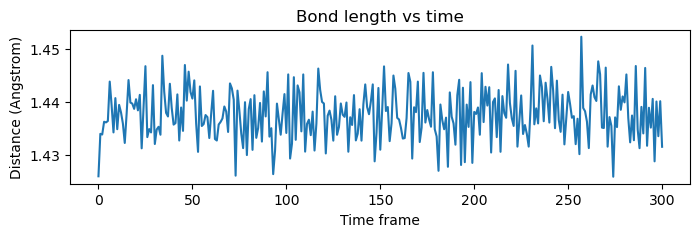

In [47]:
lbonds = np.array(lbond_vs_frame)
nbonds = np.array(nbond_vs_frame)

figs = plt.figure(figsize = (8, 2))
plt.plot(lbonds[:, 0], lbonds[:, 1])

plt.xlabel('Time frame')
plt.ylabel('Distance (Angstrom)')
plt.title('Bond length vs time')

Text(0.5, 1.0, 'Number of bonds vs time')

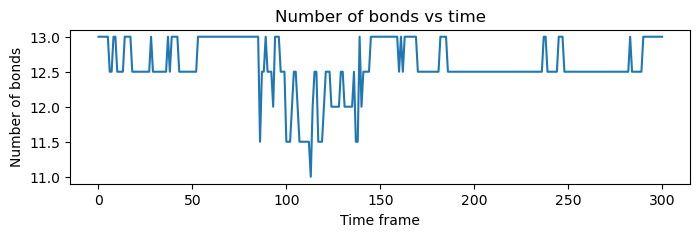

In [49]:
figs = plt.figure(figsize = (8, 2))
plt.plot(nbonds[:, 0], nbonds[:, 1])

plt.xlabel('Time frame')
plt.ylabel('Number of bonds')
plt.title('Number of bonds vs time')

In [53]:
bond_length_distributions = []
for ts in u.trajectory:
    all_bonds_ts = []
    for id1, id2 in cnt.atoms.bonds.indices:
        pos1 = u.atoms.positions[u.atoms.indices == id1]
        pos2 = u.atoms.positions[u.atoms.indices == id2]
        r = np.sqrt(np.sum((pos1-pos2)**2))
        if r < 1.8:
            all_bonds_ts.append(r)
    if frame > 0: # ignore the first frame
        histo, r_val = np.histogram(all_bonds_ts, bins=50, range=(1.3, 1.65))
        r_val = (r_val[1:]+r_val[:-1])/2
        bond_length_distributions.append([r_val, histo])

In [54]:
bld = np.array(bond_length_distributions)

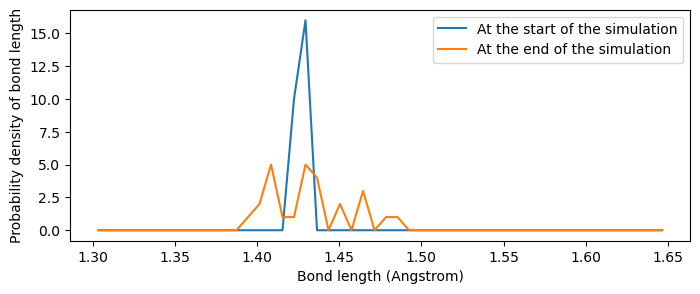

In [68]:
plt.figure(figsize = (8, 3))

plt.plot(bld[0, 0, :], bld[0, 1, :], label = "At the start of the simulation")
plt.plot(bld[-1, 0, :], bld[-1, 1, :], label = "At the end of the simulation")
plt.xlabel("Bond length (Angstrom)")
plt.ylabel("Probability density of bond length")
plt.legend()

## Alanine dipeptide case study, how it was used to identify a different axial conformation

<img src="images/5-Figure3-1.png" />